In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [2]:
spotify_df = pd.read_csv("dataset-of-10s.csv")

In [3]:
spotify_df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.7410,0.6260,1,-4.826,0,0.0886,0.020000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.4470,0.2470,5,-14.661,0,0.0346,0.871000,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.5500,0.4150,9,-6.557,0,0.0520,0.161000,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.5020,0.6480,0,-5.698,0,0.0527,0.005130,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.8070,0.8870,1,-3.892,1,0.2750,0.003810,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,0.4820,0.8730,0,-3.145,1,0.0853,0.011100,0.000000,0.4090,0.7370,165.084,214320,4,32.17301,12,1
6,Sex Metal Barbie,In This Moment,spotify:track:75BGF4LC7AOLFfxn6ukZDH,0.5330,0.9350,0,-3.704,1,0.1280,0.013900,0.000000,0.1680,0.4810,140.092,262493,4,21.04510,14,0
7,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,0.7360,0.5220,2,-8.020,1,0.1160,0.029900,0.000000,0.1080,0.3690,97.547,200387,4,60.21027,10,1
8,Holiday With HH,No Bros,spotify:track:7LBa0KNFR8IY3g7LOfXqu8,0.1660,0.9850,7,-2.886,1,0.1700,0.001830,0.014200,0.9580,0.1390,174.725,252787,4,31.23583,11,0
9,My Last,Big Sean Featuring Chris Brown,spotify:track:70tFuqBcduJv15bEnOPRTh,0.3870,0.7730,8,-5.685,1,0.1700,0.098000,0.000000,0.2090,0.3680,78.629,254120,4,23.30245,9,1


In [4]:
spotify_hits = spotify_df[spotify_df["target"] == 1]
spotify_non_hits = spotify_df[spotify_df["target"] == 0]

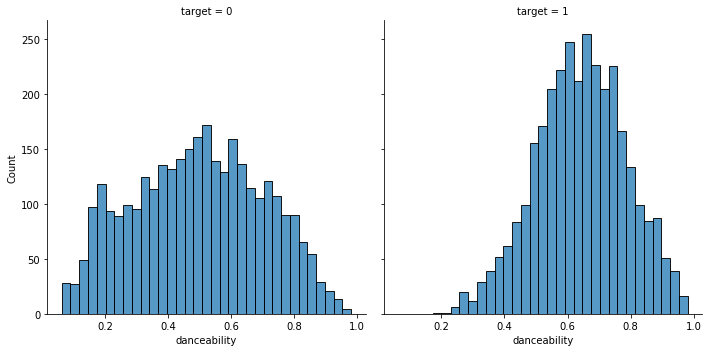

In [5]:
sns.displot(spotify_df, x="danceability", col="target", multiple="dodge")

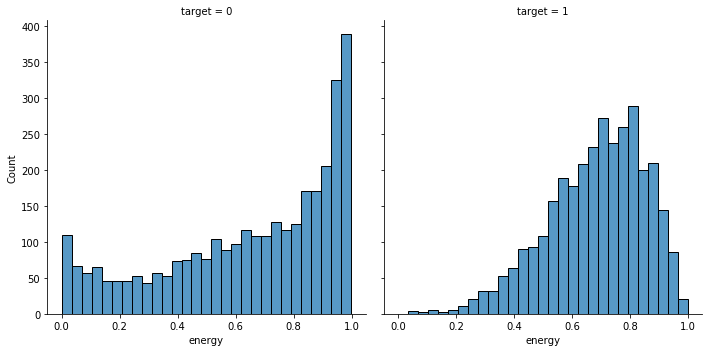

In [6]:
sns.displot(spotify_df, x="energy", col="target", multiple="dodge")

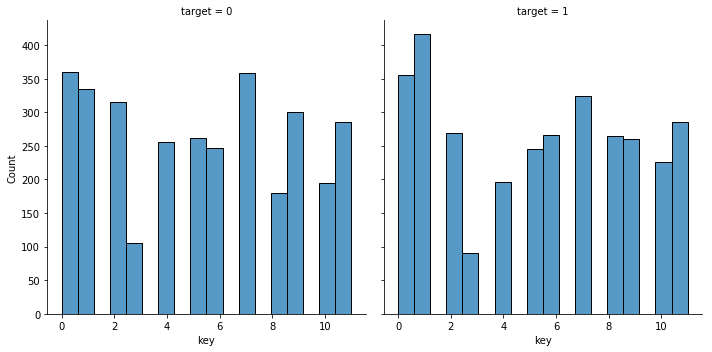

In [7]:
sns.displot(spotify_df, x="key", col="target", multiple="dodge")

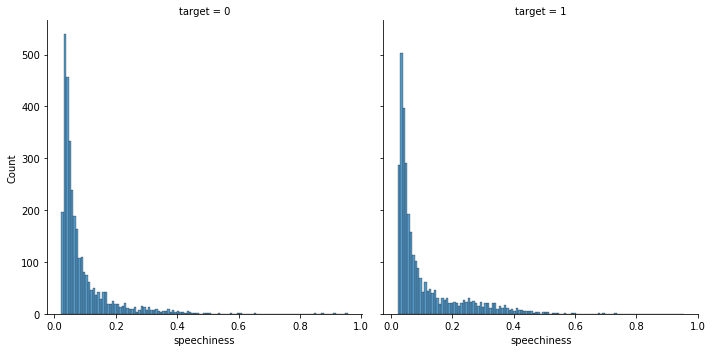

In [8]:
sns.displot(spotify_df, x="speechiness", col="target", multiple="dodge")

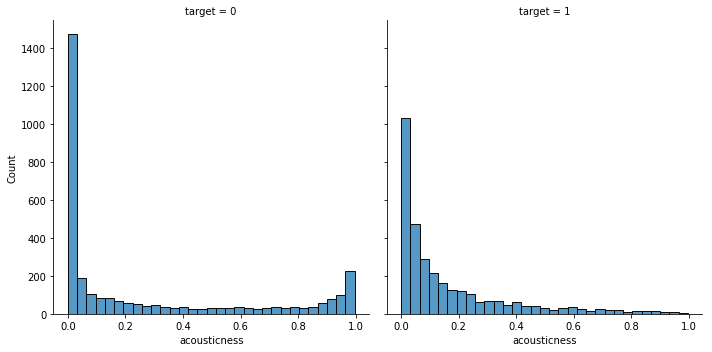

In [9]:
sns.displot(spotify_df, x="acousticness", col="target", multiple="dodge")

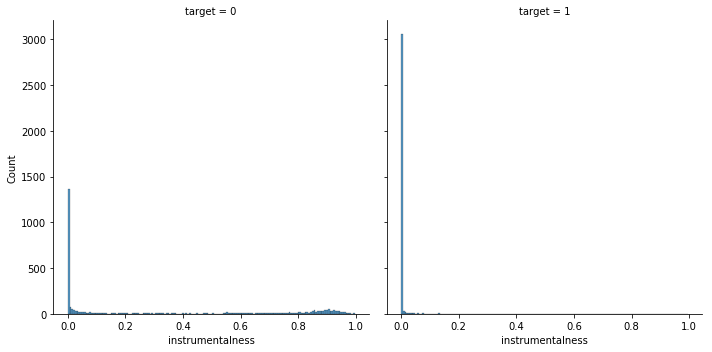

In [10]:
sns.displot(spotify_df, x="instrumentalness", col="target", multiple="dodge")

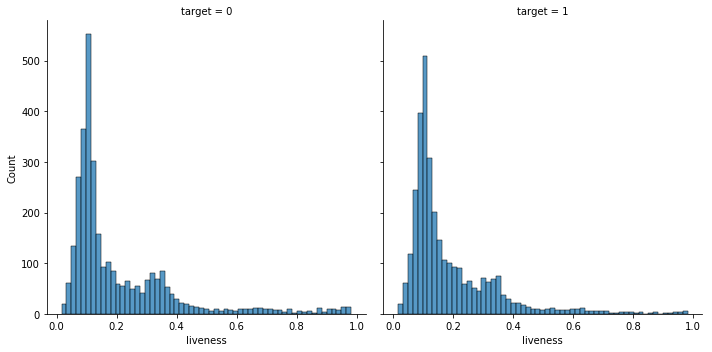

In [11]:
sns.displot(spotify_df, x="liveness", col="target", multiple="dodge")

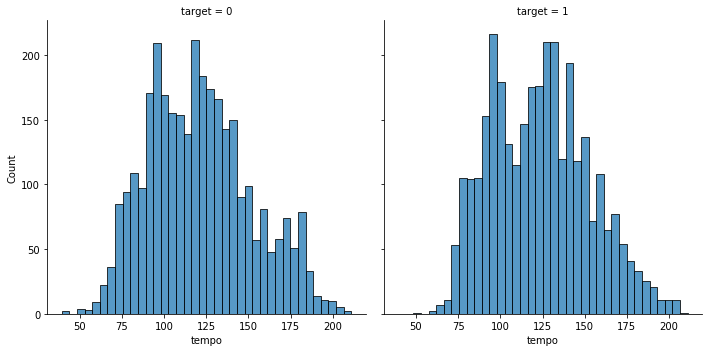

In [12]:
sns.displot(spotify_df, x="tempo", col="target", multiple="dodge")

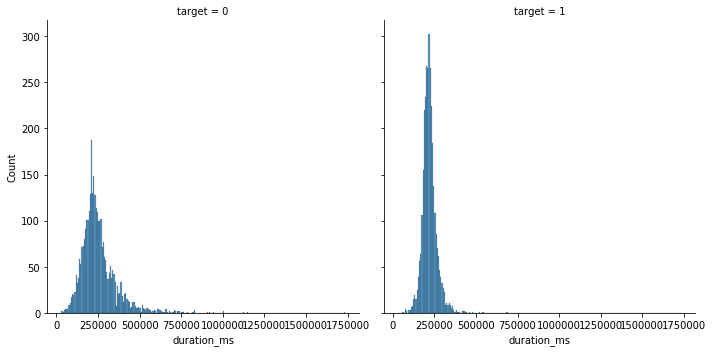

In [13]:
sns.displot(spotify_df, x="duration_ms", col="target", multiple="dodge")

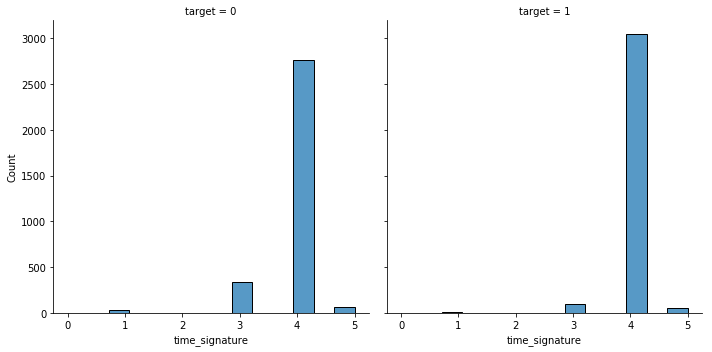

In [14]:
sns.displot(spotify_df, x="time_signature", col="target", multiple="dodge")

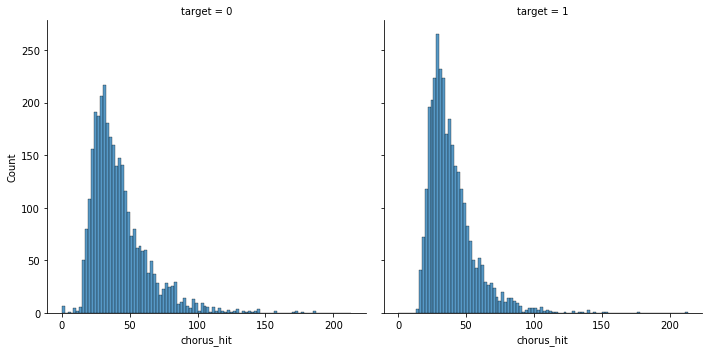

In [15]:
sns.displot(spotify_df, x="chorus_hit", col="target", multiple="dodge")

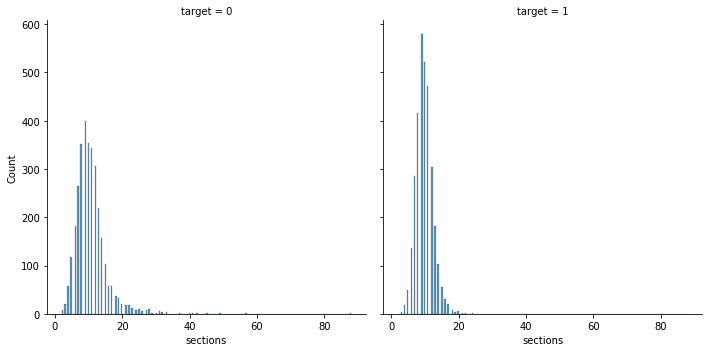

In [16]:
sns.displot(spotify_df, x="sections", col="target", multiple="dodge")

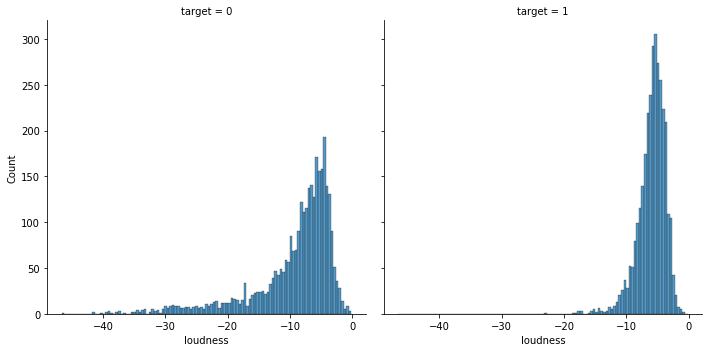

In [17]:
sns.displot(spotify_df, x="loudness", col="target", multiple="dodge")

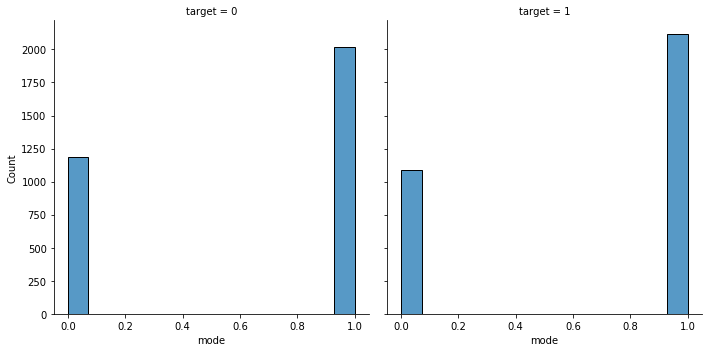

In [18]:
sns.displot(spotify_df, x="mode", col="target", multiple="dodge")

# Using PCA to reduce the dimensions

### 2 dimensions

In [19]:
possible_features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", 
                     "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", 
                     "chorus_hit", "sections"]
# Separating out the features
features = spotify_df.loc[:, possible_features].values
# Separating out the target
target = spotify_df.loc[:,["target"]].values
# Standardizing the features
x = StandardScaler().fit_transform(features)

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [21]:
finalDf = pd.concat([principalDf, spotify_df[['target']]], axis = 1)

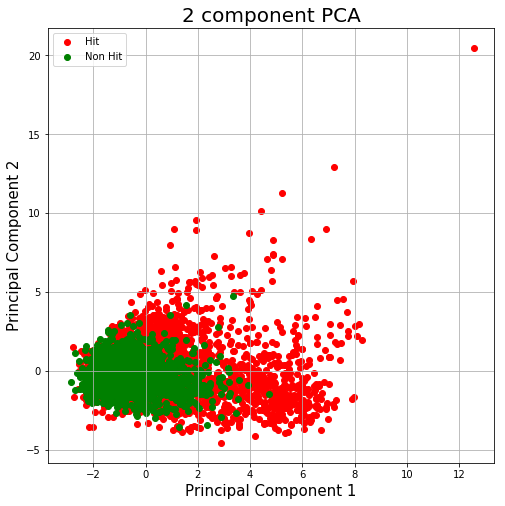

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], c = color)
ax.legend(["Hit", "Non Hit"])
ax.grid()
plt.show()

### 3 dimensions

In [23]:
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(x)
principalDf_3d = pd.DataFrame(data = principalComponents_3d, columns = ['principal component 1', 'principal component 2', 
                                                                        'principal component 3'])

finalDf_3d = pd.concat([principalDf_3d, spotify_df[['target']]], axis = 1)

<IPython.core.display.Javascript object>


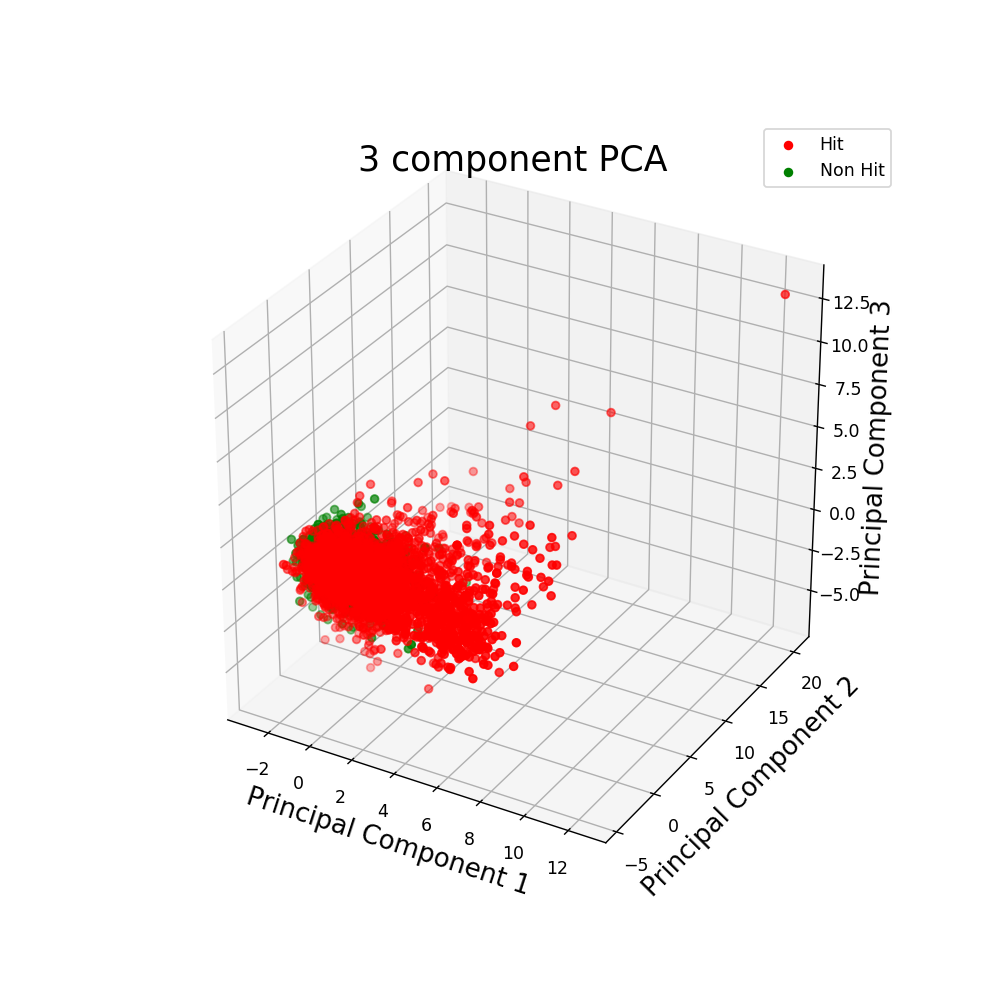

In [24]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_3d['target'] == target
    ax.scatter(finalDf_3d.loc[indicesToKeep, 'principal component 1'], 
               finalDf_3d.loc[indicesToKeep, 'principal component 2'], 
               finalDf_3d.loc[indicesToKeep, 'principal component 3'], c = color)
ax.legend(["Hit", "Non Hit"])
ax.grid()
plt.show()